# Import of Librerie

In [3]:
import zipfile
import os

from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import shutil
import cv2

from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import copy
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.transforms import ToPILImage

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

In [ ]:
file_path = '/content/drive/MyDrive/Computer Vision/PROJECT/dataset_hand_gesture/hand_craft_dataset/only_landmarks.zip'

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data')

In [ ]:
output_path = '/content/sample_data/only_landmarks/nothing'

os.makedirs(output_path, exist_ok=True)

width, height = 640, 480

num_images = 600

for i in range(num_images):
    white_image = np.ones((height, width, 3), dtype=np.uint8) * 255

    image_path = os.path.join(output_path, f'white_image_{i+1}.png')

    cv2.imwrite(image_path, white_image)

print(f"Created {num_images} white images in '{output_path}'")


Created 600 white images in '/content/sample_data/only_landmarks/nothing'


# Data Mangement

In [2]:
directory_to_clear = Path('/content/sample_data/DATA')

def clear_directory(directory_path):
    if directory_path.exists() and directory_path.is_dir():
        shutil.rmtree(directory_path)
        print(f"All sub-folder {directory_path} was eliminated.")
        directory_path.mkdir(parents=True, exist_ok=True)
    else:
        print(f"The directory {directory_path} doesn't exist or is not valid.")

#clear_directory(directory_to_clear)

All sub-folder content/sample_data/DATA was eliminated.


# Check dimension

In [ ]:
def check_image_dimensions(directory):
    dimensions = None
    all_same = True

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'png')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    current_dimensions = img.size

                    if dimensions is None:
                        dimensions = current_dimensions
                    elif current_dimensions != dimensions:
                        print(f"Dimension mismatch found in file: {image_path} (Dimensions: {current_dimensions})")
                        all_same = False

    if all_same:
        print("All images have the same dimensions:", dimensions)
    else:
        print("Not all images have the same dimensions.")

# Path to the directory containing the images
directory_path = "/content/sample_data/only_landmarks"

# Check if all images have the same dimensions
check_image_dimensions(directory_path)

All images have the same dimensions: (640, 480)


# Code for trainloader validation loader e trainloader



In [ ]:
def create_folders(base_path, categories):
    for category in categories:
        os.makedirs(os.path.join(base_path, category), exist_ok=True)

def count_images_in_subfolders(base_path, categories):
    counts = {}
    for category in categories:
        category_path = os.path.join(base_path, category)
        if os.path.isdir(category_path):
            counts[category] = len(os.listdir(category_path))
    return counts

def print_image_counts(counts, folder_name):
    print(f"Image counts in {folder_name} folder:")
    for category, count in counts.items():
        print(f"{category}: {count}")
    print()

def split_dataset(dataset_path, train_path, val_path, test_path, split_ratio=(0.9, 0.05, 0.05)):
    categories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    create_folders(train_path, categories)
    create_folders(val_path, categories)
    create_folders(test_path, categories)

    original_counts = count_images_in_subfolders(dataset_path, categories)
    print_image_counts(original_counts, 'original dataset')

    for category in categories:
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)

        random.shuffle(images)

        train_end = int(len(images) * split_ratio[0])
        val_end = train_end + int(len(images) * split_ratio[1])

        train_images = images[:train_end]
        val_images = images[train_end:val_end]
        test_images = images[val_end:]

        for image in train_images:
            shutil.copy(os.path.join(category_path, image), os.path.join(train_path, category, image))
        for image in val_images:
            shutil.copy(os.path.join(category_path, image), os.path.join(val_path, category, image))
        for image in test_images:
            shutil.copy(os.path.join(category_path, image), os.path.join(test_path, category, image))

    train_counts = count_images_in_subfolders(train_path, categories)
    val_counts = count_images_in_subfolders(val_path, categories)
    test_counts = count_images_in_subfolders(test_path, categories)

    print_image_counts(train_counts, 'train')
    print_image_counts(val_counts, 'validation')
    print_image_counts(test_counts, 'test')

if __name__ == "__main__":
    dataset_path = '/content/sample_data/only_landmarks'
    train_path = '/content/sample_data/DATA/train'
    val_path = '/content/sample_data/DATA/validation'
    test_path = '/content/sample_data/DATA/test'

    split_dataset(dataset_path, train_path, val_path, test_path)


Image counts in original dataset folder:
I: 601
L: 601
O: 601
Z: 601
A: 600
G: 601
nothing: 600
U: 601
W: 601
K: 601
P: 601
J: 601
S: 602
del: 590
D: 601
T: 601
M: 601
N: 601
E: 601
B: 601
R: 601
H: 601
F: 601
Y: 601
X: 601
V: 601
C: 601
space: 601
Q: 601

Image counts in train folder:
I: 540
L: 540
O: 540
Z: 540
A: 540
G: 540
nothing: 540
U: 540
W: 540
K: 540
P: 540
J: 540
S: 541
del: 531
D: 540
T: 540
M: 540
N: 540
E: 540
B: 540
R: 540
H: 540
F: 540
Y: 540
X: 540
V: 540
C: 540
space: 540
Q: 540

Image counts in validation folder:
I: 30
L: 30
O: 30
Z: 30
A: 30
G: 30
nothing: 30
U: 30
W: 30
K: 30
P: 30
J: 30
S: 30
del: 29
D: 30
T: 30
M: 30
N: 30
E: 30
B: 30
R: 30
H: 30
F: 30
Y: 30
X: 30
V: 30
C: 30
space: 30
Q: 30

Image counts in test folder:
I: 31
L: 31
O: 31
Z: 31
A: 30
G: 31
nothing: 30
U: 31
W: 31
K: 31
P: 31
J: 31
S: 31
del: 30
D: 31
T: 31
M: 31
N: 31
E: 31
B: 31
R: 31
H: 31
F: 31
Y: 31
X: 31
V: 31
C: 31
space: 31
Q: 31



In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((480, 640)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
transform_test = transforms.Compose([
    transforms.Resize((480, 640)),
    transforms.ToTensor(),
])

In [ ]:
# directory path
train_path = '/content/sample_data/DATA/train'
val_path = '/content/sample_data/DATA/validation'
test_path = '/content/sample_data/DATA/test'

# load dataset
train_data = ImageFolder(root=train_path, transform=transform_train)
val_data = ImageFolder(root=val_path, transform=transform_test)
test_data = ImageFolder(root=test_path, transform=transform_test)

# size batch
batch_size = 16

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

class_names = train_data.classes
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


# AlexNet
image size 640x480

In [4]:
class HandGestureAlexNet(nn.Module):
    def __init__(self, num_classes=29):
        super(HandGestureAlexNet, self).__init__()
        # Load pre-trained model
        self.alexnet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)

        # change last layer for our task
        num_ftrs = self.alexnet.classifier[6].in_features
        self.alexnet.classifier[6] = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.alexnet(x)

num_classes = 29
model = HandGestureAlexNet(num_classes=num_classes)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 157MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

HandGestureAlexNet(
  (alexnet): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=Fal

# Train

In [ ]:
train_losses = []
val_losses = []
val_accuracies = []


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader, desc=f'{phase} Epoch {epoch}/{num_epochs - 1}', leave=False):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_losses.append(epoch_loss)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)

                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model

model = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)

save_path = '/content/drive/MyDrive/Computer Vision/PROJECT/dataset_hand_gesture/hand_craft_dataset/AlexNet_only_landmark_hand_gesture_cnn_with_metrics.pth'

torch.save({
    'model_state_dict': model.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'val_accuracies': val_accuracies,
}, save_path)

print(f"Modello e metriche salvate con successo in {save_path}.")

Epoch 0/4
----------


train Loss: 1.4047 Acc: 0.5995


val Loss: 2.0689 Acc: 0.2290
Epoch 1/4
----------


train Loss: 0.1220 Acc: 0.9649


val Loss: 3.0870 Acc: 0.0955
Epoch 2/4
----------


train Loss: 0.0462 Acc: 0.9870


val Loss: 2.2016 Acc: 0.2371
Epoch 3/4
----------


train Loss: 0.0309 Acc: 0.9911


val Loss: 2.3325 Acc: 0.2129
Epoch 4/4
----------


train Loss: 0.0200 Acc: 0.9946


val Loss: 3.0405 Acc: 0.1438
Best val Acc: 0.2371
Modello e metriche salvate con successo in /content/drive/MyDrive/Computer Vision/PROJECT/dataset_hand_gesture/hand_craft_dataset/AlexNet_only_landmark_hand_gesture_cnn_with_metrics.pth.


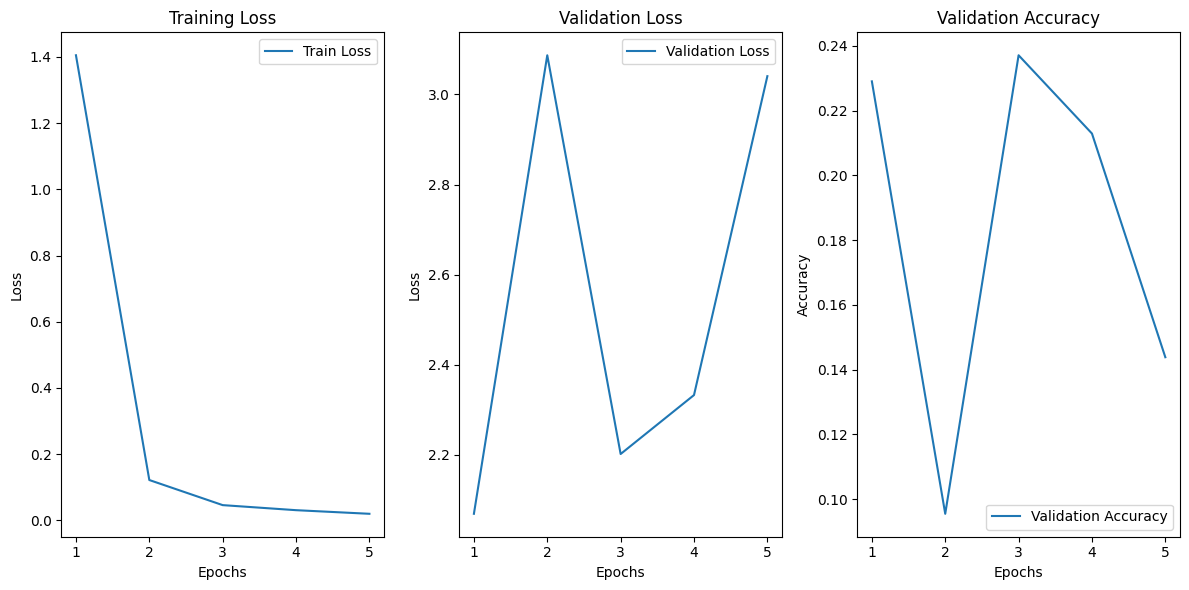

In [ ]:
file_path = '/content/drive/MyDrive/Computer Vision/PROJECT/dataset_hand_gesture/hand_craft_dataset/AlexNet_only_landmark_hand_gesture_cnn_with_metrics.pth'

checkpoint = torch.load(file_path, map_location=torch.device('cpu'))

train_losses = checkpoint['train_losses']
val_losses = checkpoint['val_losses']
val_accuracies = checkpoint['val_accuracies']

if isinstance(val_accuracies[0], torch.Tensor):
    val_accuracies = [acc.cpu().numpy() for acc in val_accuracies]

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot validation loss
plt.subplot(1, 3, 2)
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 3, 3)
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Test of CNN

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Accuracy: 0.2277
Precision: 0.4877
Recall: 0.2277
F1 Score: 0.2302
Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.03      0.06        30
           B       0.31      0.48      0.38        31
           C       1.00      0.61      0.76        31
           D       0.10      0.19      0.13        31
           E       0.33      0.58      0.42        31
           F       0.00      0.00      0.00        31
           G       0.00      0.00      0.00        31
           H       1.00      0.03      0.06        31
           I       0.00      0.00      0.00        31
           J       0.45      0.45      0.45        31
           K       0.00      0.00      0.00        31
           L       1.00      0.03      0.06        31
           M       1.00      0.03      0.06        31
           N       0.00      0.00      0.00        31
           O       0.85      0.71      0.77        31
           P       1.00      0.06      0.12  

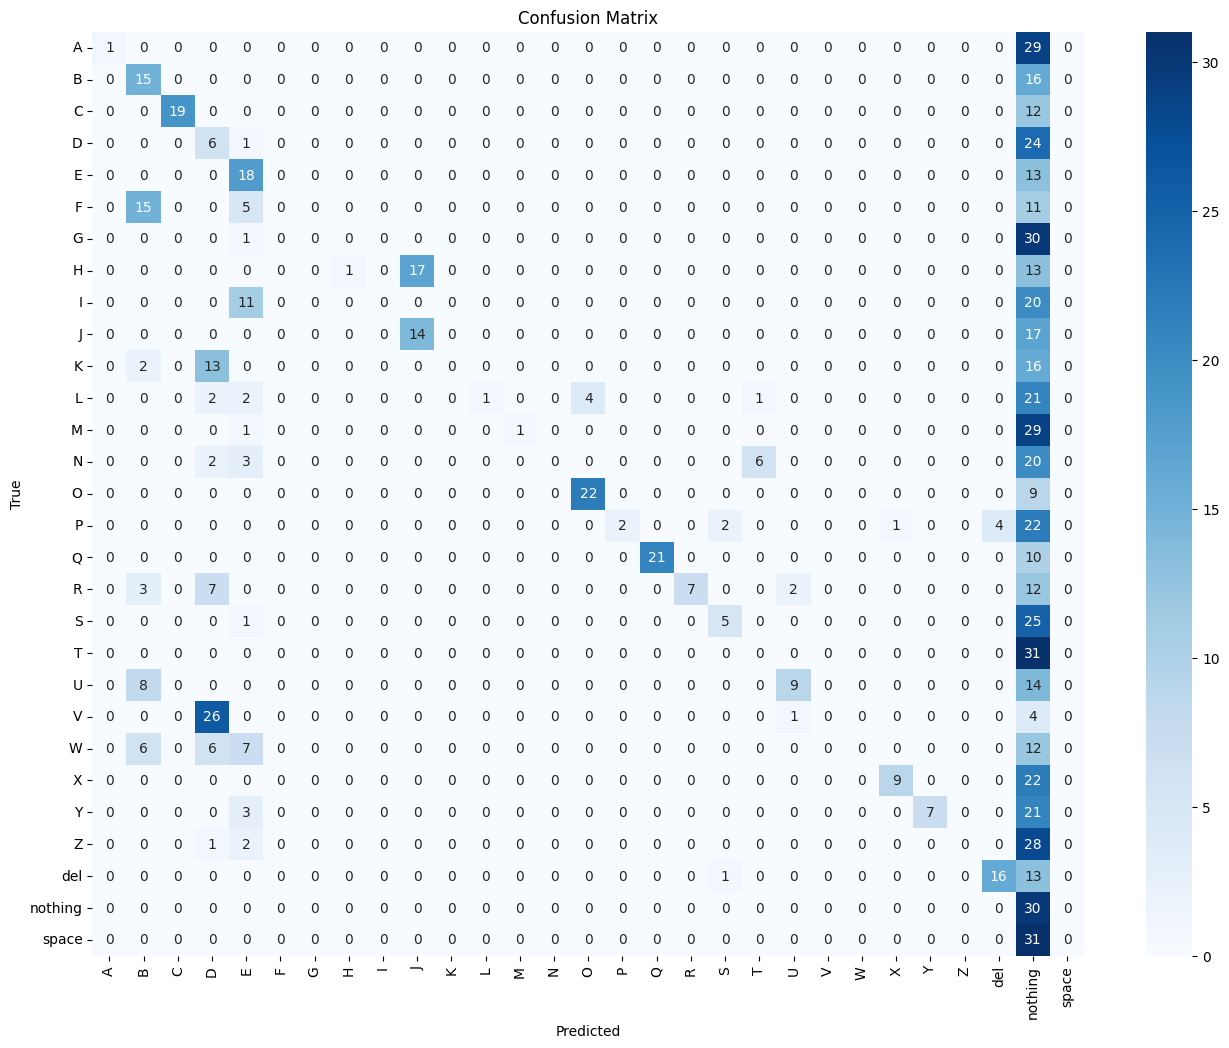

In [ ]:
file_path = '/content/drive/MyDrive/Computer Vision/PROJECT/dataset_hand_gesture/hand_craft_dataset/AlexNet_only_landmark_hand_gesture_cnn_with_metrics.pth'

num_classes = len(test_data.classes)
model = HandGestureAlexNet(num_classes=num_classes)

checkpoint = torch.load(file_path)
model.load_state_dict(checkpoint['model_state_dict'])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def calculate_metrics(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    class_report = classification_report(all_labels, all_preds, target_names=test_data.classes)

    accuracy = np.sum(all_preds == all_labels) / len(all_labels)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Classification Report:')
    print(class_report)

    plt.figure(figsize=(16, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.classes, yticklabels=test_data.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

calculate_metrics(model, test_loader)